In [3]:
import pandas as pd
import normalize
import outliers
import summary

In [4]:
train_data = pd.read_csv('train.csv')

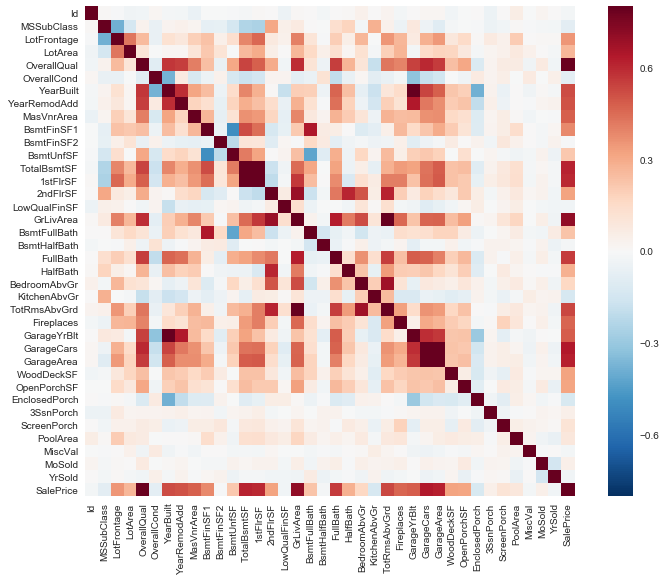

In [4]:
summary.all_correlations(train_data)

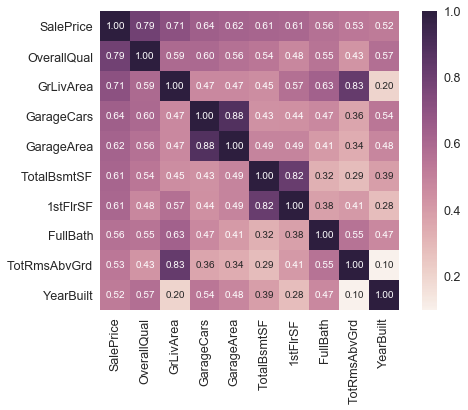

In [5]:
summary.top_k_correlations(train_data, 10)

In [6]:
train_data = normalize.remove_correlated_features(train_data)

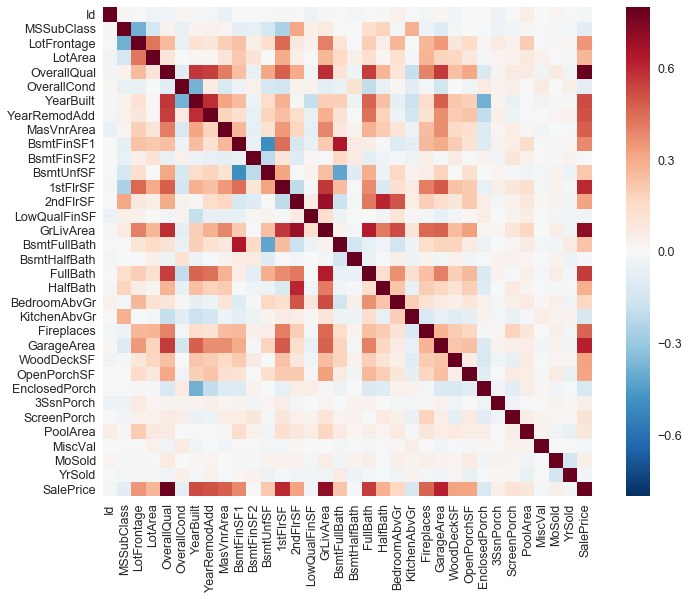

In [7]:
summary.all_correlations(train_data)

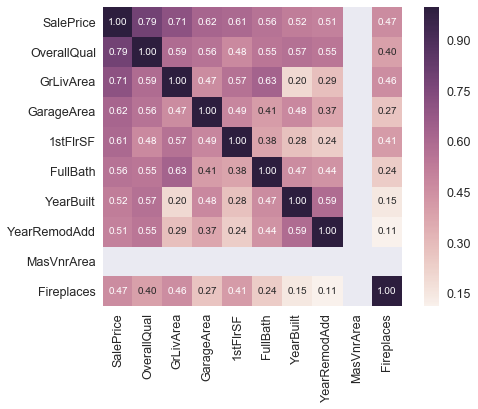

In [8]:
summary.top_k_correlations(train_data, 10)

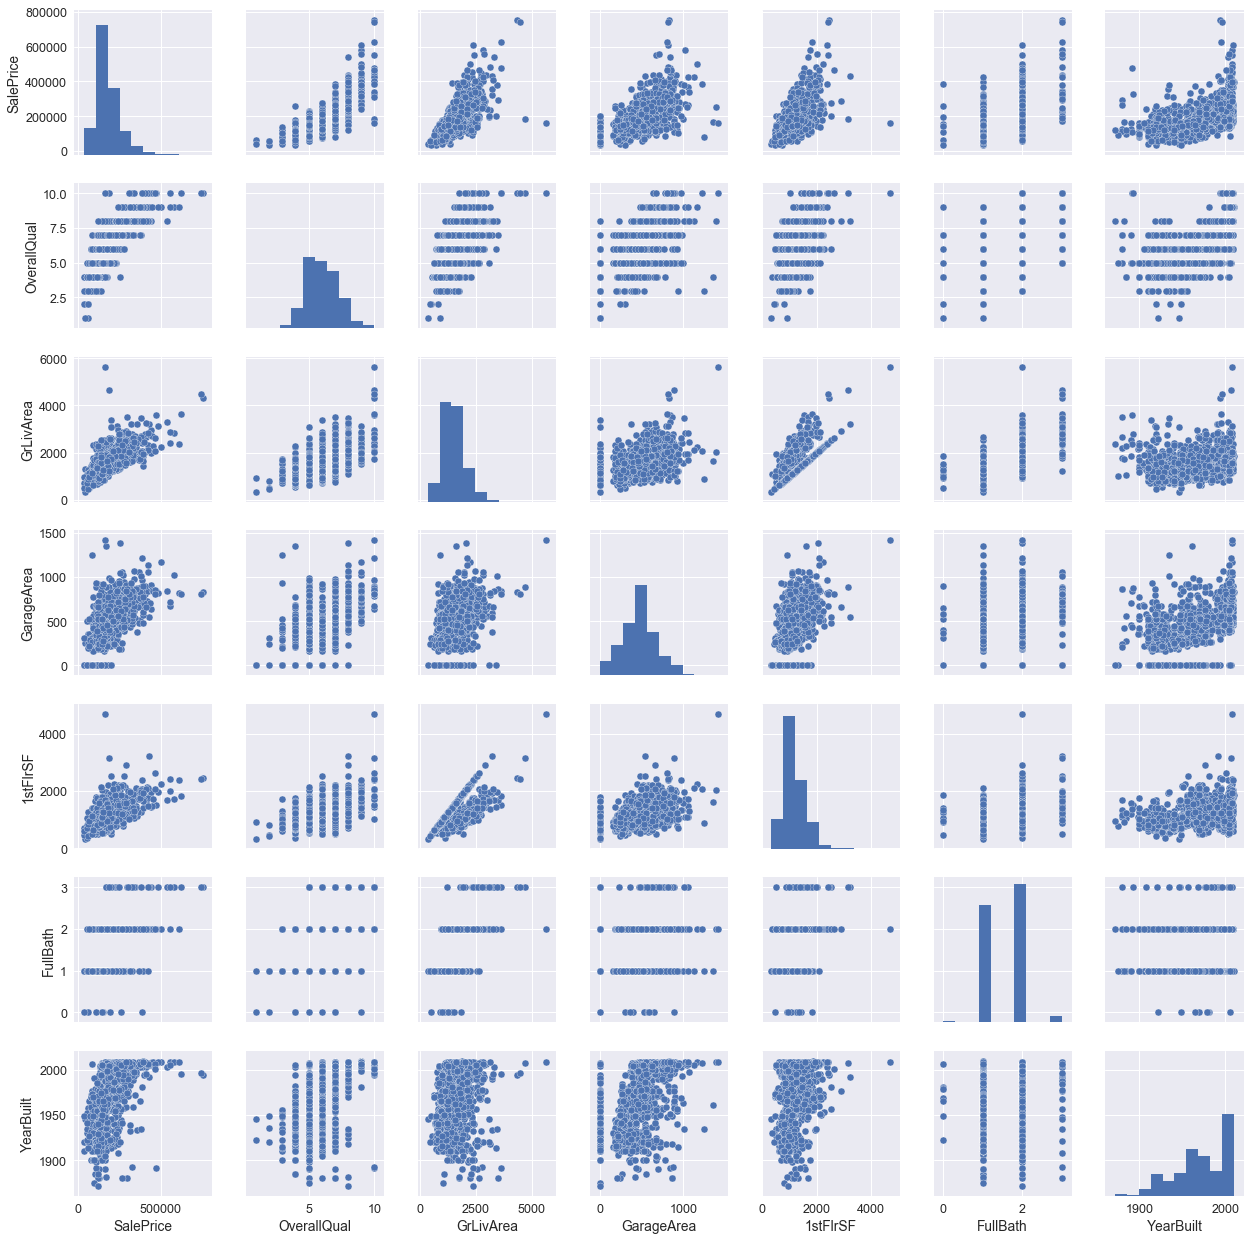

In [9]:
summary.pair_plot(train_data)

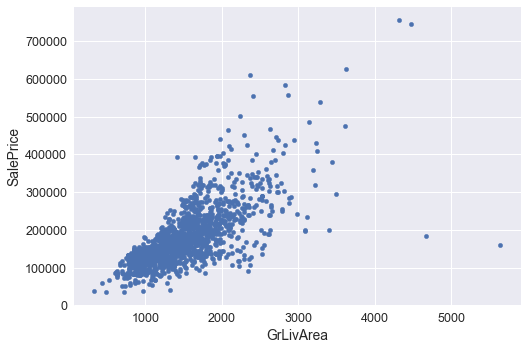

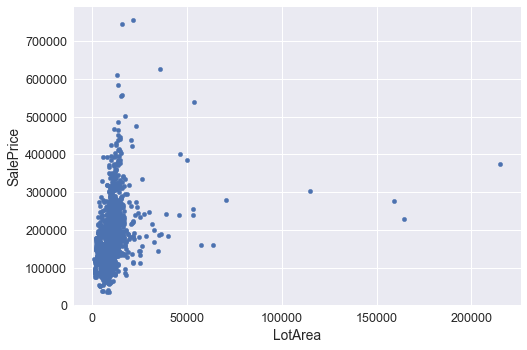

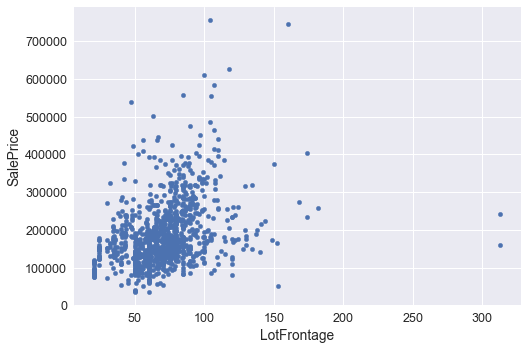

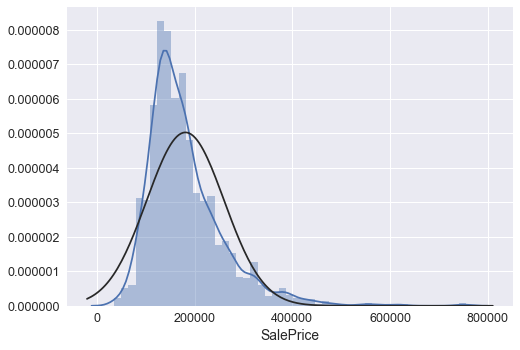

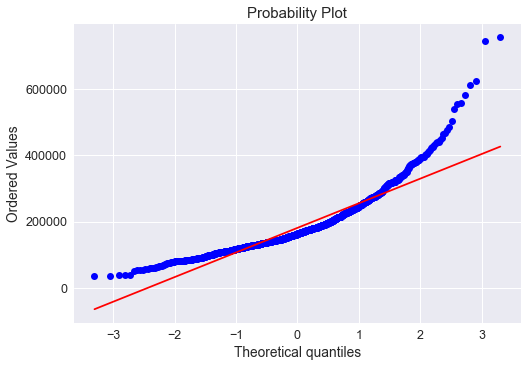

In [10]:
summary.scatter_plot(train_data, 'GrLivArea', 'SalePrice')
summary.scatter_plot(train_data, 'LotArea', 'SalePrice')
summary.scatter_plot(train_data, 'LotFrontage', 'SalePrice')
summary.histogram(train_data, 'SalePrice')

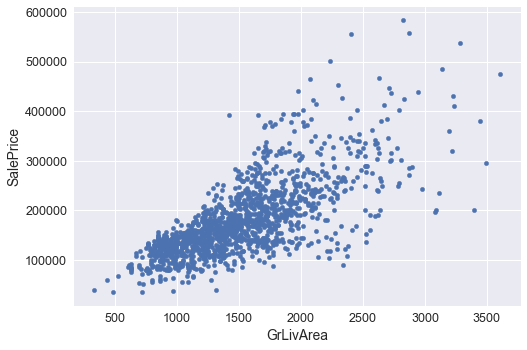

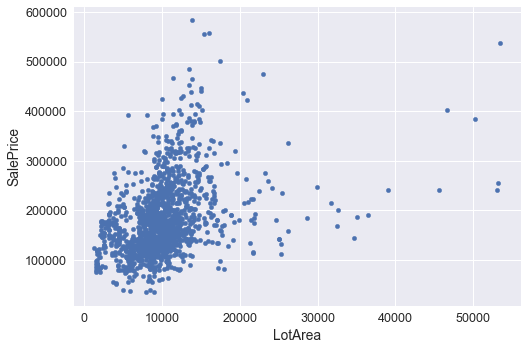

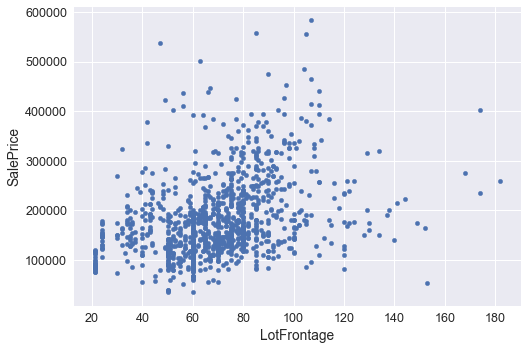

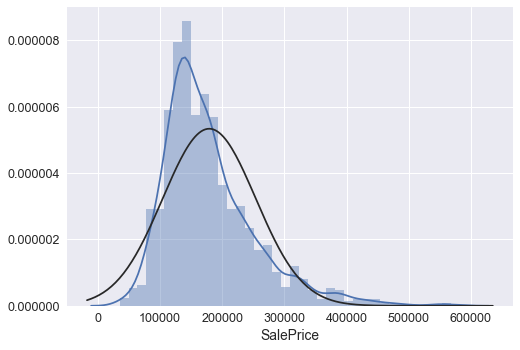

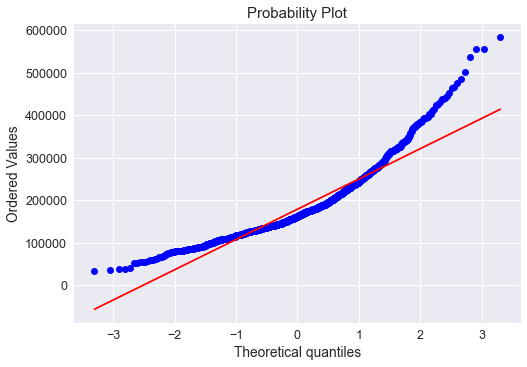

In [11]:
#Get rid of outliers and try again
train_data = outliers.remove_outliers(train_data)
summary.scatter_plot(train_data, 'GrLivArea', 'SalePrice')
summary.scatter_plot(train_data, 'LotArea', 'SalePrice')
summary.scatter_plot(train_data, 'LotFrontage', 'SalePrice')
summary.histogram(train_data, 'SalePrice')

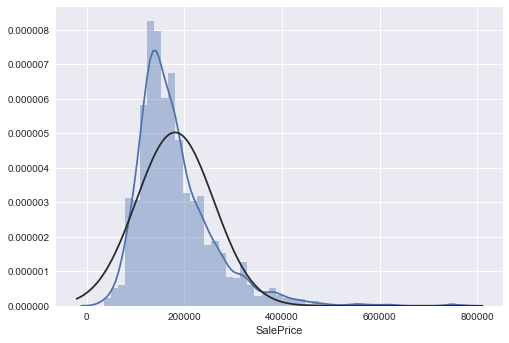

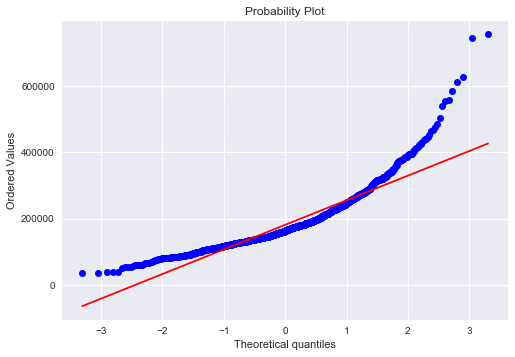

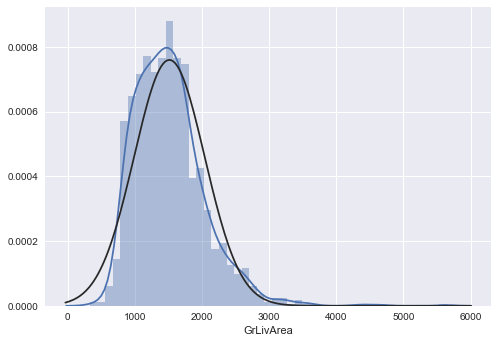

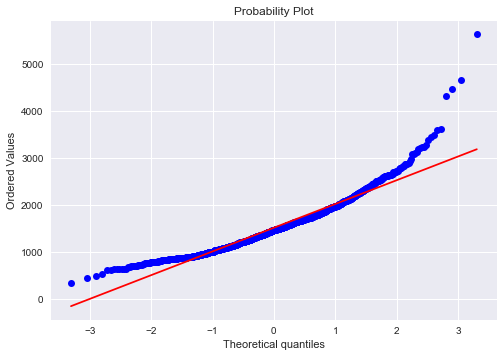

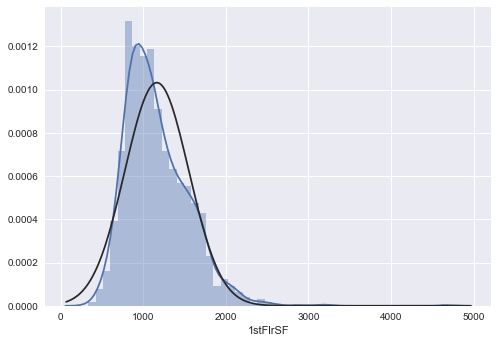

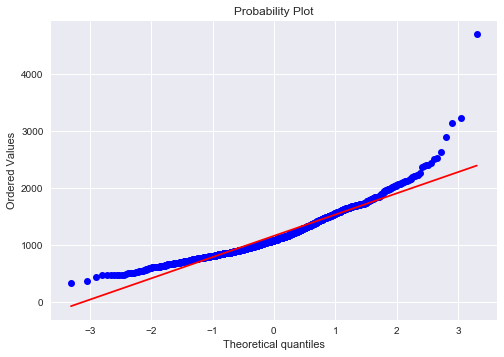

In [10]:
#now examine normality
summary.histogram(train_data, 'SalePrice')
summary.histogram(train_data, 'GrLivArea')
summary.histogram(train_data, '1stFlrSF')

In [12]:
train_data = normalize.take_logs(train_data)

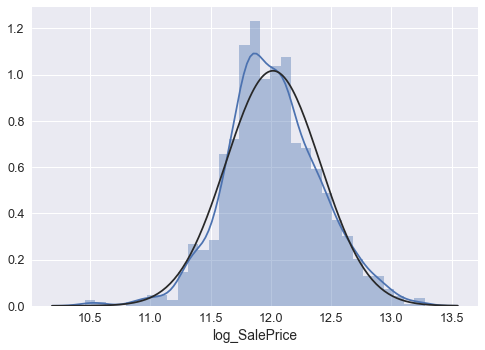

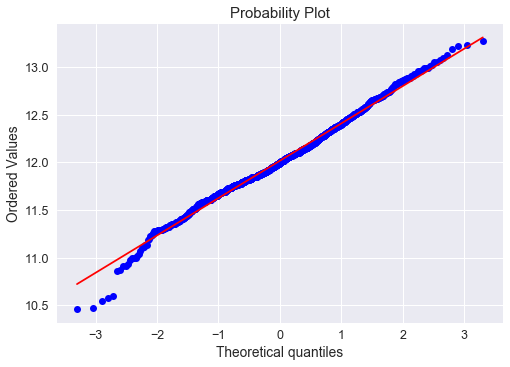

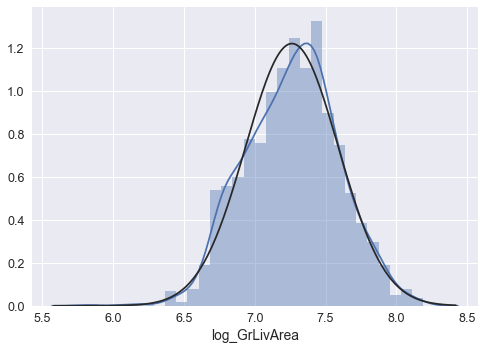

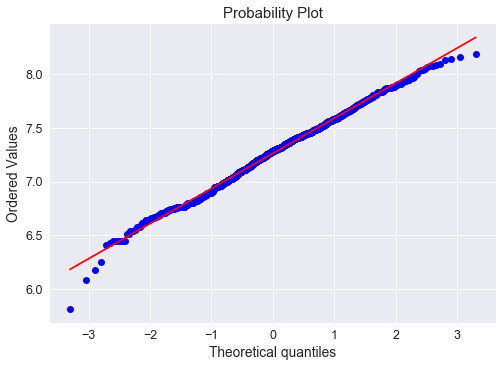

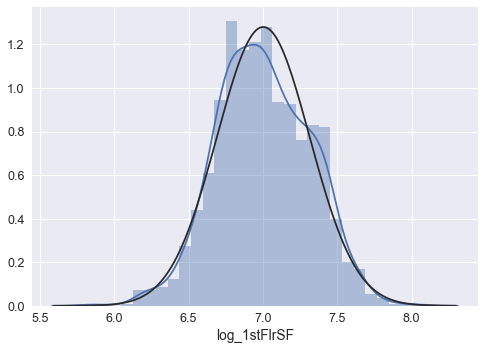

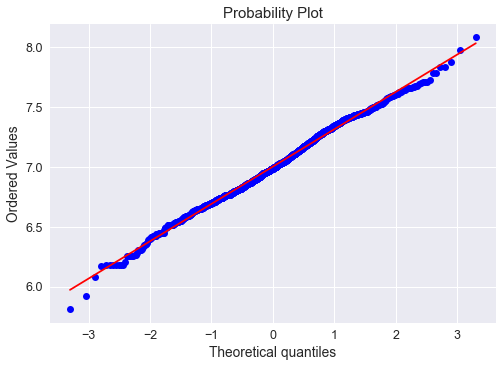

In [13]:
#reexamine normality
summary.histogram(train_data, 'log_SalePrice')
summary.histogram(train_data, 'log_GrLivArea')
summary.histogram(train_data, 'log_1stFlrSF')

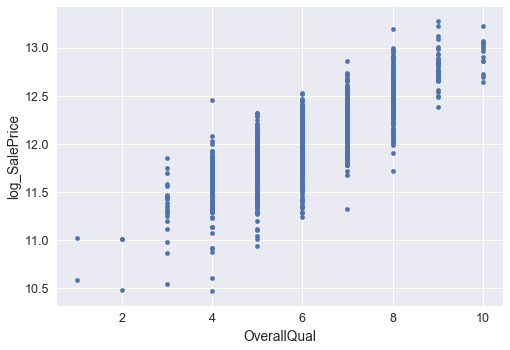

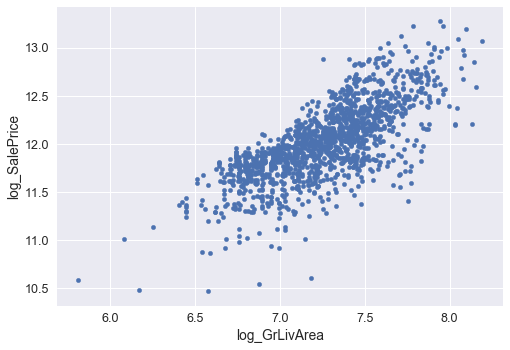

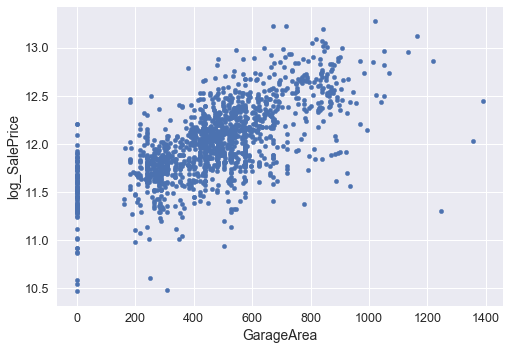

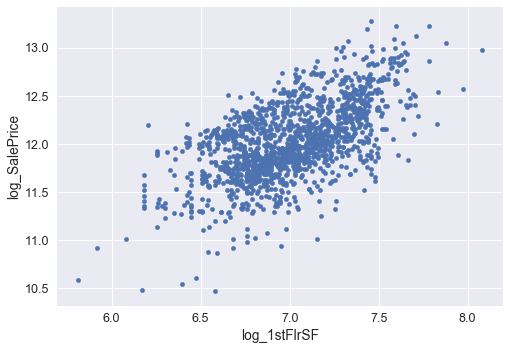

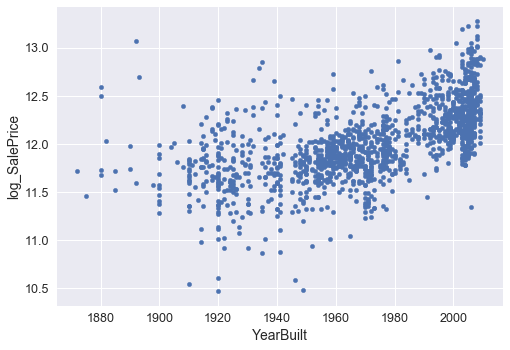

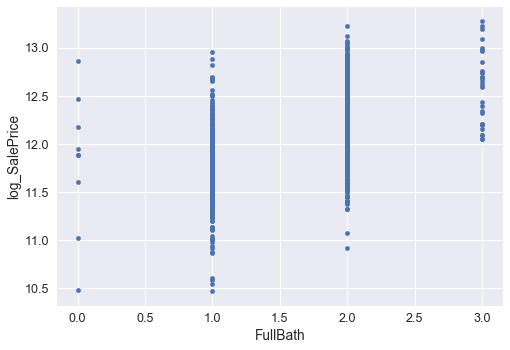

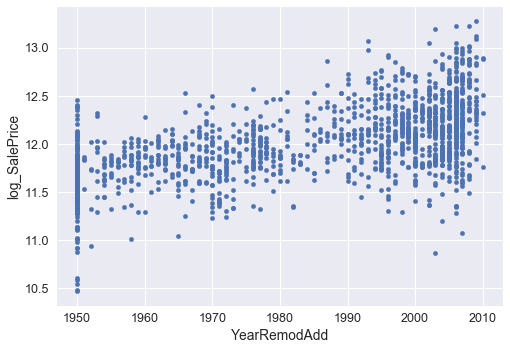

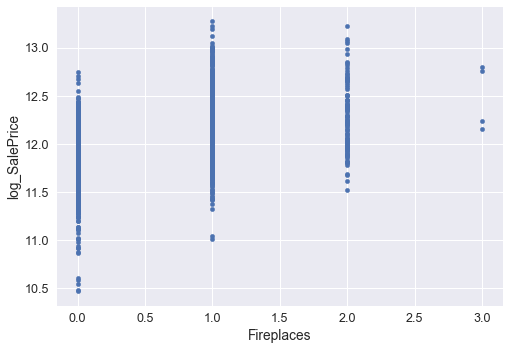

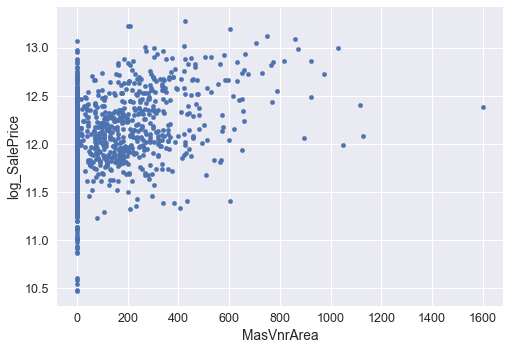

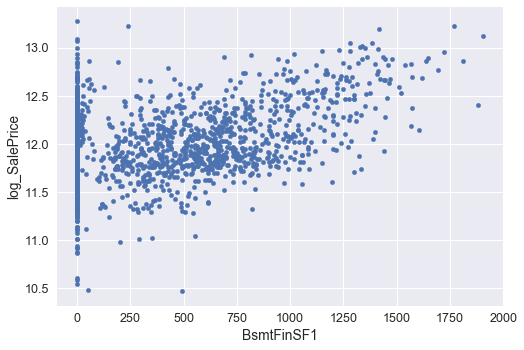

In [14]:
corrmat = train_data.corr()
sale_corrs = corrmat['log_SalePrice']
sale_corrs = sale_corrs.sort_values(ascending = False)
#ignore the first one because it is a comparison of sales price to sales price with a correlation of 1
sale_corrs = sale_corrs[1:11]
for elt in sale_corrs.iteritems():
    summary.scatter_plot(train_data, elt[0], 'log_SalePrice')